In [105]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [12]:
from ISLP import load_data
df_brain = load_data('BrainCancer')
df_brain.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [13]:
df_brain.isnull().sum()

sex          0
diagnosis    1
loc          0
ki           0
gtv          0
stereo       0
status       0
time         0
dtype: int64

In [22]:
df = df_brain.dropna()
df.reset_index(drop=True)
print ("Shape of dataset: ", df.shape)
df.head()

Shape of dataset:  (87, 8)


,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        87 non-null     category
 1   diagnosis  87 non-null     category
 2   loc        87 non-null     category
 3   ki         87 non-null     int64   
 4   gtv        87 non-null     float64 
 5   stereo     87 non-null     category
 6   status     87 non-null     int64   
 7   time       87 non-null     float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 4.3 KB


In [16]:
df.sex.value_counts()

Female    45
Male      42
Name: sex, dtype: int64

In [33]:
df['loc'].unique()

['Infratentorial', 'Supratentorial']
Categories (2, object): ['Infratentorial', 'Supratentorial']

In [95]:
df['stereo'].unique()

['SRS', 'SRT']
Categories (2, object): ['SRS', 'SRT']

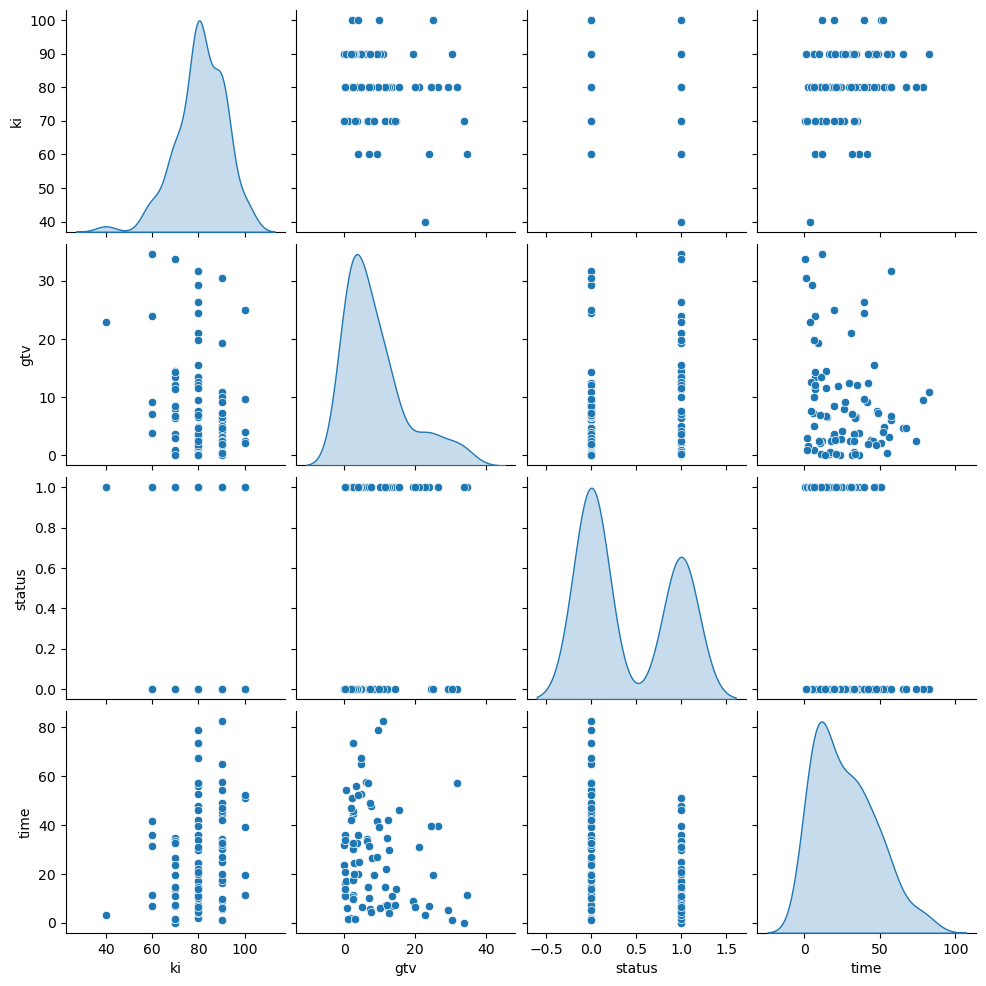

In [96]:
# pairplot to check for correlation
import seaborn as sns
sns.pairplot(df, diag_kind = "kde")


In [87]:
X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis']

X

array([['Female', 'Infratentorial', 90, 6.11, 'SRS', 0, 57.64],
       ['Male', 'Supratentorial', 90, 19.35, 'SRT', 1, 8.98],
       ['Female', 'Infratentorial', 70, 7.95, 'SRS', 0, 26.46],
       ['Female', 'Supratentorial', 80, 7.61, 'SRT', 1, 47.8],
       ['Male', 'Supratentorial', 90, 5.06, 'SRT', 1, 6.3],
       ['Female', 'Supratentorial', 80, 4.82, 'SRS', 0, 52.75],
       ['Male', 'Supratentorial', 80, 3.19, 'SRT', 0, 55.8],
       ['Male', 'Supratentorial', 80, 12.37, 'SRT', 0, 42.1],
       ['Female', 'Supratentorial', 70, 12.16, 'SRT', 0, 34.66],
       ['Male', 'Supratentorial', 100, 2.53, 'SRT', 0, 11.48],
       ['Male', 'Supratentorial', 80, 0.14, 'SRT', 1, 35.93],
       ['Female', 'Infratentorial', 90, 6.54, 'SRS', 0, 34.26],
       ['Female', 'Infratentorial', 90, 0.63, 'SRS', 0, 32.98],
       ['Female', 'Supratentorial', 60, 9.18, 'SRT', 0, 41.44],
       ['Female', 'Supratentorial', 70, 11.38, 'SRS', 1, 7.05],
       ['Female', 'Infratentorial', 60, 24.0, 'SRT', 1

In [88]:
from sklearn import preprocessing
la_sex = preprocessing.LabelEncoder()
la_sex.fit(['Female','Male'])
X[:,0] = la_sex.transform(X[:,0])


la_loc = preprocessing.LabelEncoder()
la_loc.fit(['Infratentorial', 'Supratentorial'])
X[:,1] = la_loc.transform(X[:,1])


la_stereo = preprocessing.LabelEncoder()
la_stereo.fit(['SRS', 'SRT'])
X[:,4] = la_stereo.transform(X[:,4]) 

X[0:5]


array([[0, 0, 90, 6.11, 0, 0, 57.64],
       [1, 1, 90, 19.35, 1, 1, 8.98],
       [0, 0, 70, 7.95, 0, 0, 26.46],
       [0, 1, 80, 7.61, 1, 1, 47.8],
       [1, 1, 90, 5.06, 1, 1, 6.3]], dtype=object)

In [97]:
# normalize the dataset
X_scaled = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))
X_scaled[0:5]

array([[0.        , 0.        , 0.83333333, 0.17614785, 0.        ,
        0.        , 0.69790278],
       [1.        , 1.        , 0.83333333, 0.55847531, 1.        ,
        1.        , 0.10801309],
       [0.        , 0.        , 0.5       , 0.22928097, 0.        ,
        0.        , 0.31991757],
       [0.        , 1.        , 0.66666667, 0.21946289, 1.        ,
        1.        , 0.57861559],
       [1.        , 1.        , 0.83333333, 0.14582732, 1.        ,
        1.        , 0.07552431]])

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

k = 6
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_pred_knn = neigh.predict(X_test)

# Accuracy evaluation
f1 = f1_score(y_test, y_pred_knn, average='macro')

# get accuracy
acc = accuracy_score(y_test, y_pred_knn)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

F1 Score:  0.5022770398481974
Accuracy:  0.7777777777777778


In [129]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.55555556, 0.66666667, 0.7037037 , 0.7037037 , 0.66666667,
       0.77777778, 0.77777778, 0.77777778, 0.7037037 ])

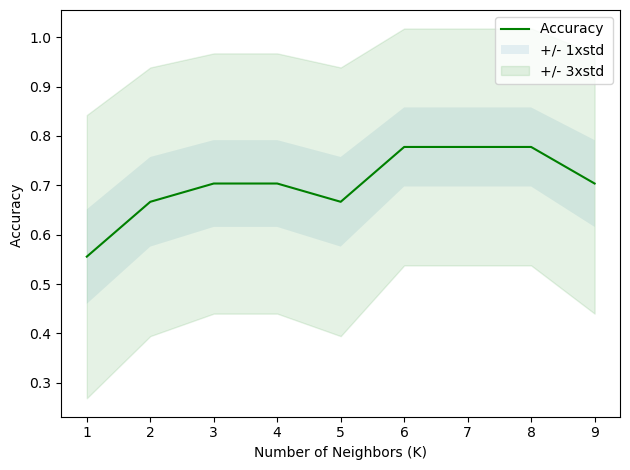

In [130]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [131]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7777777777777778 with k= 6


## naive bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


In [135]:
f1 = f1_score(y_test, y_pred_gnb, average='macro')

# get accuracy
acc = accuracy_score(y_test, y_pred_gnb)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

F1 Score:  0.22916666666666666
Accuracy:  0.37037037037037035
